# 第6章　物流の最適ルートをコンサルティング

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
factories = pd.read_csv('Data100/6_data/tbl_factory.csv', index_col=0)
factories.head()

,FCName,FCDemand,FCRegion
FCID,,,
FC00001,東京工場,28,関東
FC00002,木更津工場,29,関東
FC00003,多摩工場,31,関東
FC00004,横須賀工場,25,関東
FC00005,仙台工場,21,東北


In [23]:
warehouses = pd.read_csv('Data100/6_data/tbl_warehouse.csv', index_col=0)
warehouses.head()

,WHName,WHSupply,WHRegion
WHID,,,
WH00001,杉並倉庫,35,関東
WH00002,品川倉庫,41,関東
WH00003,豊洲倉庫,42,関東
WH00004,郡山倉庫,60,東北
WH00005,仙台倉庫,72,東北


In [24]:
cost = pd.read_csv('Data100/6_data/rel_cost.csv', index_col=0)
cost.head()

,FCID,WHID,Cost
RCostID,,,
1,FC00001,WH00001,0.4
2,FC00001,WH00002,0.8
3,FC00001,WH00003,1.5
4,FC00002,WH00001,0.9
5,FC00002,WH00002,0.8


In [25]:
trans = pd.read_csv('Data100/6_data/tbl_transaction.csv', index_col=0)
trans.head()

,TransactionDate,ToFC,FromWH,Quantity
TRID,,,,
0,2019-01-01 02:11:10,FC00004,WH00003,33
1,2019-01-01 06:12:42,FC00007,WH00006,19
2,2019-01-01 06:32:32,FC00006,WH00004,31
3,2019-01-01 07:17:06,FC00002,WH00003,18
4,2019-01-01 07:52:18,FC00001,WH00002,30


In [26]:
print(len(trans))
print(len(cost))
print(len(warehouses))
print(len(factories))

4000
24
6
8


In [27]:
join_data = trans.merge(cost, left_on=['ToFC', 'FromWH'], right_on=['FCID', 'WHID'], how='left')
join_data.head()

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8


In [28]:
join_data = join_data.merge(factories, on='FCID', how='left')

In [29]:
join_data = join_data.merge(warehouses, on='WHID', how='left')

In [30]:
join_data.drop(['FCID', 'WHID'],axis=1, inplace=True)
join_data.head()

,TransactionDate,ToFC,FromWH,Quantity,Cost,FCName,FCDemand,FCRegion,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,FC00004,WH00003,33,1.1,横須賀工場,25,関東,豊洲倉庫,42,関東
1,2019-01-01 06:12:42,FC00007,WH00006,19,1.3,那須工場,25,東北,山形倉庫,65,東北
2,2019-01-01 06:32:32,FC00006,WH00004,31,0.9,山形工場,30,東北,郡山倉庫,60,東北
3,2019-01-01 07:17:06,FC00002,WH00003,18,1.6,木更津工場,29,関東,豊洲倉庫,42,関東
4,2019-01-01 07:52:18,FC00001,WH00002,30,0.8,東京工場,28,関東,品川倉庫,41,関東


In [31]:
# --順番を入れ替えて見やすく--
join_data = join_data.iloc[:, [0,3,4,1,5,6,7,2,8,9,10]]
join_data.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FCRegion,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,横須賀工場,25,関東,WH00003,豊洲倉庫,42,関東
1,2019-01-01 06:12:42,19,1.3,FC00007,那須工場,25,東北,WH00006,山形倉庫,65,東北
2,2019-01-01 06:32:32,31,0.9,FC00006,山形工場,30,東北,WH00004,郡山倉庫,60,東北
3,2019-01-01 07:17:06,18,1.6,FC00002,木更津工場,29,関東,WH00003,豊洲倉庫,42,関東
4,2019-01-01 07:52:18,30,0.8,FC00001,東京工場,28,関東,WH00002,品川倉庫,41,関東


In [38]:
join_data['WHRegion'].value_counts()

関東    2000
東北    2000
Name: WHRegion, dtype: int64

In [32]:
kanto = join_data.loc[join_data['WHRegion']=='関東']
kanto.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FCRegion,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,横須賀工場,25,関東,WH00003,豊洲倉庫,42,関東
3,2019-01-01 07:17:06,18,1.6,FC00002,木更津工場,29,関東,WH00003,豊洲倉庫,42,関東
4,2019-01-01 07:52:18,30,0.8,FC00001,東京工場,28,関東,WH00002,品川倉庫,41,関東
7,2019-01-01 09:09:30,12,1.5,FC00001,東京工場,28,関東,WH00003,豊洲倉庫,42,関東
8,2019-01-01 10:52:55,27,1.5,FC00003,多摩工場,31,関東,WH00003,豊洲倉庫,42,関東


In [34]:
tohoku = join_data.loc[join_data['WHRegion']=='東北']
tohoku.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FCRegion,FromWH,WHName,WHSupply,WHRegion
1,2019-01-01 06:12:42,19,1.3,FC00007,那須工場,25,東北,WH00006,山形倉庫,65,東北
2,2019-01-01 06:32:32,31,0.9,FC00006,山形工場,30,東北,WH00004,郡山倉庫,60,東北
5,2019-01-01 08:56:09,31,0.3,FC00005,仙台工場,21,東北,WH00005,仙台倉庫,72,東北
6,2019-01-01 09:00:15,33,0.7,FC00006,山形工場,30,東北,WH00006,山形倉庫,65,東北
9,2019-01-01 14:12:51,21,0.7,FC00006,山形工場,30,東北,WH00006,山形倉庫,65,東北


In [40]:
kanto['Cost'].sum()

2189.3

In [41]:
tohoku['Cost'].sum()

2062.0

In [43]:
kanto.describe()

,Quantity,Cost,FCDemand,WHSupply
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,24.573000,1.094650,28.234000,39.338500
std,8.748539,0.346665,2.171313,3.120382
min,10.000000,0.400000,25.000000,35.000000
25%,17.000000,0.800000,25.000000,35.000000
50%,25.000000,1.100000,28.000000,41.000000
75%,32.000000,1.500000,29.000000,42.000000
max,42.000000,1.600000,31.000000,42.000000


In [44]:
tohoku.describe()

,Quantity,Cost,FCDemand,WHSupply
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,25.107000,1.031000,23.247000,65.704000
std,8.679759,0.335597,4.983112,4.908608
min,10.000000,0.300000,16.000000,60.000000
25%,18.000000,0.800000,21.000000,60.000000
50%,25.000000,1.100000,25.000000,65.000000
75%,32.000000,1.300000,30.000000,72.000000
max,48.000000,1.500000,30.000000,72.000000


# ネットワーク可視化

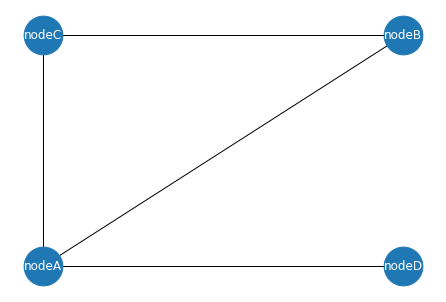

In [53]:
import networkx as nx
import matplotlib.pyplot as plt

# グラフオブジェクトの作成．
G=nx.Graph()

# 頂点の設定
G.add_node("nodeA")
G.add_node("nodeB")
G.add_node("nodeC")
G.add_node("nodeD")

# 辺の設定
G.add_edge("nodeA","nodeB")
G.add_edge("nodeA","nodeC")
G.add_edge("nodeB","nodeC")
G.add_edge("nodeA","nodeD")

# 座標の設定
pos={}
pos["nodeA"]=(0,0)
pos["nodeB"]=(1,1)
pos["nodeC"]=(0,1)
pos["nodeD"]=(1,0)

# 描画
nx.draw(G,pos, with_labels=True, node_size=1500, font_color='w')

# 表示
plt.show()

## ルートの重み付け

In [48]:
df_w = pd.read_csv('Data100/6_data/network_weight.csv')
df_p = pd.read_csv('Data100/6_data/network_pos.csv')
# weight
df_w

,A,B,C,D,E
0,0.639921,0.143353,0.944669,0.521848,0.000000
1,0.264556,0.000000,0.456150,0.568434,0.000000
2,0.617635,0.612096,0.616934,0.943748,0.000000
3,0.000000,0.000000,0.697631,0.060225,0.666767
4,0.670638,0.210383,0.000000,0.315428,0.000000


In [49]:
# position
df_p

,A,B,C,D,E
0,0,0,2,2,1
1,0,2,0,2,1


/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


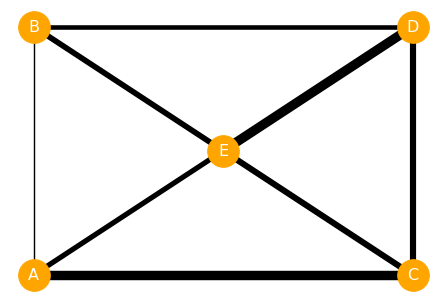

In [50]:
# エッジの重みのリスト化(線の太さ)
size = 10
edge_weights = []
for i in range(len(df_w)):
    for j in range(len(df_w.columns)):
        edge_weights.append(df_w.iloc[i][j]*size)
        
# Graph object
G = nx.Graph()

# 頂点の追加
for i in range(len(df_w.columns)):
    G.add_node(df_w.columns[i])
    
# 辺の追加
for i in range(len(df_w.columns)):
    for j in range(len(df_w.columns)):
        G.add_edge(df_w.columns[i], df_w.columns[j])

# 座標の設定
pos = {}
for i in range(len(df_w.columns)):
    node = df_w.columns[i]
    pos[node] = (df_p[node][0], df_p[node][1])
    
# 描画
nx.draw(G, pos, with_labels=True, font_size=16, node_size=1000, node_color='orange', font_color='w', width=edge_weights)

plt.show()

# 輸送ルート情報kらネットワーク可視化

In [55]:
df_tr = pd.read_csv('Data100/6_data/trans_route.csv', index_col='工場')
df_tr

,F1,F2,F3,F4
工場,,,,
W1,15,15,0,5
W2,5,0,30,5
W3,10,15,2,15


In [69]:
df_pos = pd.DataFrame([[0,0,0,1,1,1,1], [2,4,6,1,3,5,7]], columns=['W3','W2','W1','F4','F3','F2','F1'])

df_pos

,W3,W2,W1,F4,F3,F2,F1
0,0,0,0,1,1,1,1
1,2,4,6,1,3,5,7


/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


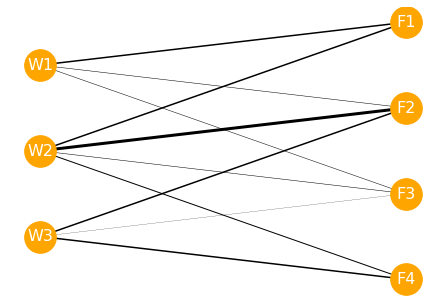

In [79]:
# エッジの重みのリスト化(線の太さ)
size = 0.1
edge_weights = []
for i in range(len(df_tr)):
    for j in range(len(df_tr.columns)):
        edge_weights.append(df_tr.iloc[i][j]*size)
        
# Graph object
G = nx.Graph()

# 頂点の追加
for i in range(len(df_tr.columns)):
    G.add_node(df_tr.columns[i])
    for j in range(len(df_tr.index)):
        G.add_node(df_tr.index[j])
    
    
# 辺の追加
for i in range(len(df_tr.columns)):
    for j in range(len(df_tr.index)):
        G.add_edge(df_tr.columns[i], df_tr.index[j])

# 座標の設定
pos = {}
for i in range(len(df_tr.columns)):
    node = df_tr.columns[i]
    pos[node] = (df_pos[node][0], df_pos[node][1])
    for j in range(len(df_tr.index)):
        node = df_tr.index[j]
        pos[node] = (df_pos[node][0], df_pos[node][1])
    
# 描画
nx.draw(G, pos, with_labels=True, font_size=16, node_size=1000, node_color='orange', font_color='w', width=edge_weights)

plt.show()

# 最適化問題
**目的関数を最小化**<br>最小化を行うときに守るべきルールを制約条件と呼ぶ．

In [83]:
df_tc = pd.read_csv('Data100/6_data/trans_cost.csv', index_col='工場')
df_tc

,F1,F2,F3,F4
工場,,,,
W1,10,10,11,27
W2,18,21,12,14
W3,15,12,14,12


In [84]:
df_tr

,F1,F2,F3,F4
工場,,,,
W1,15,15,0,5
W2,5,0,30,5
W3,10,15,2,15


In [85]:
# --輸送コスト関数--

def trans_cost(df_tr, df_tc):
    cost = 0
    for i in range(len(df_tc.index)):
        for j in range(len(df_tr.columns)):
            cost += df_tr.iloc[i,j] * df_tc.iloc[i,j]
            
    return cost


In [86]:
trans_cost(df_tr,df_tc)

1493

In [87]:
# --制約条件--
import pandas as pd

# データ読み込み
df_tr = pd.read_csv('Data100/6_data/trans_route.csv', index_col="工場")
df_demand = pd.read_csv('Data100/6_data/demand.csv')
df_supply = pd.read_csv('Data100/6_data/supply.csv')

# 需要側の制約条件
for i in range(len(df_demand.columns)):
    temp_sum = sum(df_tr[df_demand.columns[i]])
    print(str(df_demand.columns[i])+"への輸送量:"+str(temp_sum)+" (需要量:"+str(df_demand.iloc[0][i])+")")
    if temp_sum>=df_demand.iloc[0][i]:
        print("需要量を満たしています。")
    else:
        print("需要量を満たしていません。輸送ルートを再計算して下さい。")

# 供給側の制約条件
for i in range(len(df_supply.columns)):
    temp_sum = sum(df_tr.loc[df_supply.columns[i]])
    print(str(df_supply.columns[i])+"からの輸送量:"+str(temp_sum)+" (供給限界:"+str(df_supply.iloc[0][i])+")")
    if temp_sum<=df_supply.iloc[0][i]:
        print("供給限界の範囲内です。")
    else:
        print("供給限界を超過しています。輸送ルートを再計算して下さい。")


F1への輸送量:30 (需要量:28)
需要量を満たしています。
F2への輸送量:30 (需要量:29)
需要量を満たしています。
F3への輸送量:32 (需要量:31)
需要量を満たしています。
F4への輸送量:25 (需要量:25)
需要量を満たしています。
W1からの輸送量:35 (供給限界:35)
供給限界の範囲内です。
W2からの輸送量:40 (供給限界:41)
供給限界の範囲内です。
W3からの輸送量:42 (供給限界:42)
供給限界の範囲内です。


## 輸送ルートを変更して輸送コスト関数の変化を確認

In [89]:
df_tr_new = pd.read_csv('Data100/6_data/trans_route_new.csv', index_col='工場')
df_tr_new

,F1,F2,F3,F4
工場,,,,
W1,15,15,0,0
W2,5,0,30,10
W3,10,15,2,15


In [93]:
df_demand

,F1,F2,F3,F4
0,28,29,31,25


In [94]:
df_supply

,W1,W2,W3
0,35,41,42


In [90]:
print(f'総輸送コスト: {trans_cost(df_tr_new, df_tc)}')

総輸送コスト: 1428


In [91]:
# 制約条件:需要
for i in range(len(df_demand.columns)):
    temp_sum = sum(df_tr_new[df_demand.columns[i]])
    print(str(df_demand.columns[i])+"への輸送量:"+str(temp_sum)+" (需要量:"+str(df_demand.iloc[0][i])+")")
    if temp_sum>=df_demand.iloc[0][i]:
        print("需要量を満たしています。")
    else:
        print("需要量を満たしていません。輸送ルートを再計算して下さい。")

F1への輸送量:30 (需要量:28)
需要量を満たしています。
F2への輸送量:30 (需要量:29)
需要量を満たしています。
F3への輸送量:32 (需要量:31)
需要量を満たしています。
F4への輸送量:25 (需要量:25)
需要量を満たしています。


In [92]:
# 制約条件：供給
for i in range(len(df_supply.columns)):
    temp_sum = sum(df_tr_new.loc[df_supply.columns[i]])
    print(str(df_supply.columns[i])+"からの輸送量:"+str(temp_sum)+" (供給限界:"+str(df_supply.iloc[0][i])+")")
    if temp_sum<=df_supply.iloc[0][i]:
        print("供給限界の範囲内です。")
    else:
        print("供給限界を超過しています。輸送ルートを再計算して下さい。")


W1からの輸送量:30 (供給限界:35)
供給限界の範囲内です。
W2からの輸送量:45 (供給限界:41)
供給限界を超過しています。輸送ルートを再計算して下さい。
W3からの輸送量:42 (供給限界:42)
供給限界の範囲内です。
